In [42]:
import pandas as pd

corona = pd.read_csv('data.csv')
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

-------------------

-------------------


Cleaning

-------------------

-------------------

In [43]:
corona.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [44]:
corona.drop(['dateRep', 'geoId', 'countryterritoryCode', 'continentExp', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis=1, inplace=True)

In [45]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      61900 non-null  int64  
 1   month                    61900 non-null  int64  
 2   year                     61900 non-null  int64  
 3   cases                    61900 non-null  int64  
 4   deaths                   61900 non-null  int64  
 5   countriesAndTerritories  61900 non-null  object 
 6   popData2019              61777 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.3+ MB


In [46]:
corona.isnull().sum()

day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
popData2019                123
dtype: int64

In [47]:
corona['popData2019'].fillna(0, inplace=True)

In [48]:
corona.isna().any()

day                        False
month                      False
year                       False
cases                      False
deaths                     False
countriesAndTerritories    False
popData2019                False
dtype: bool

In [49]:
corona.isnull().sum()

day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
popData2019                0
dtype: int64

In [50]:
corona['popData2019'] = (corona['popData2019']/float(10000000)).round(2)

In [63]:
corona.sample(2)
# corona.head()

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
45047,13,12,2020,1292,21,Philippines,10.81
61777,21,7,2020,102,1,Zimbabwe,1.46


In [64]:
corona.rename({
    'popData2019' : 'Population',
    'countriesAndTerritories' : 'Countries',},
    axis=1, inplace=True)

In [65]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         61900 non-null  int64  
 1   month       61900 non-null  int64  
 2   year        61900 non-null  int64  
 3   cases       61900 non-null  int64  
 4   deaths      61900 non-null  int64  
 5   Countries   61900 non-null  object 
 6   Population  61900 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.3+ MB


In [66]:
corona.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.090652
std,8.841582,2.954776,0.032882,6779.224479,131.227055,15.298848
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,0.130000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,0.720000
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.850000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,143.380000


In [67]:
corona[corona['deaths'] == 4928]

,day,month,year,cases,deaths,Countries,Population
59243,16,4,2020,30148,4928,United_States_of_America,32.91


In [68]:
corona[corona['cases'] == 234633]

,day,month,year,cases,deaths,Countries,Population
59003,12,12,2020,234633,3343,United_States_of_America,32.91


In [70]:
corona[corona['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population
6311,20,5,2020,-209,0,Benin,1.18
10935,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,0.00
16906,7,9,2020,-8261,3800,Ecuador,1.74
17024,12,5,2020,-50,18,Ecuador,1.74
17027,9,5,2020,-1480,50,Ecuador,1.74
17029,7,5,2020,-2461,49,Ecuador,1.74
20558,3,6,2020,-766,107,France,6.70
29276,20,6,2020,-148,47,Italy,6.04
30170,11,9,2020,-6,0,Jersey,0.01
30491,22,7,2020,-110,0,Jordan,1.01


In [71]:
corona.loc[corona['cases'] < 0, 'cases'] = corona.loc[corona['cases'] < 0, 'cases'] * -1

corona.loc[corona['deaths'] < 0, 'deaths'] = corona.loc[corona['deaths'] < 0, 'deaths'] * -1

In [73]:
corona[corona['deaths'].lt(0)]

,day,month,year,cases,deaths,Countries,Population


In [74]:
corona.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.675864,26.133489,4.090652
std,8.841582,2.954776,0.032882,6779.134381,131.211538,15.298848
min,1.000000,1.000000,2019.000000,0.000000,0.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,0.130000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,0.720000
75%,23.000000,10.000000,2020.000000,274.000000,4.000000,2.850000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,143.380000


-------------------

-------------------

Analysing

-------------------

-------------------

In [83]:
corona.sort_values(by = ['year', 'month', 'day'], ascending=[True, True, True], inplace=True, ignore_index=True)



In [86]:
dmin = corona.loc[0].day
mmin = corona.loc[0].month
ymin = corona.loc[0].year

dmax = corona.loc[corona.shape[0]-1].day
mmax = corona.loc[corona.shape[0]-1].month
ymax = corona.loc[corona.shape[0]-1].year

from datetime import date

d1 = date(ymax, mmax, dmax)
d2 = date(ymin, mmin, dmin)
corona_days = (d1 - d2).days
print('Days =', corona_days)

corona_global_deaths_avg = corona['deaths'].sum() / corona_days
corona_global_cases_avg = corona['cases'].sum() / corona_days

print('corona global deaths average : {:.0f}'.format(corona_global_deaths_avg))
print('corona global cases average : {:.0f}'.format(corona_global_cases_avg))



Days = 349
corona global deaths avarage : 4635
corona global cases avarage : 204975


<BarContainer object of 2 artists>

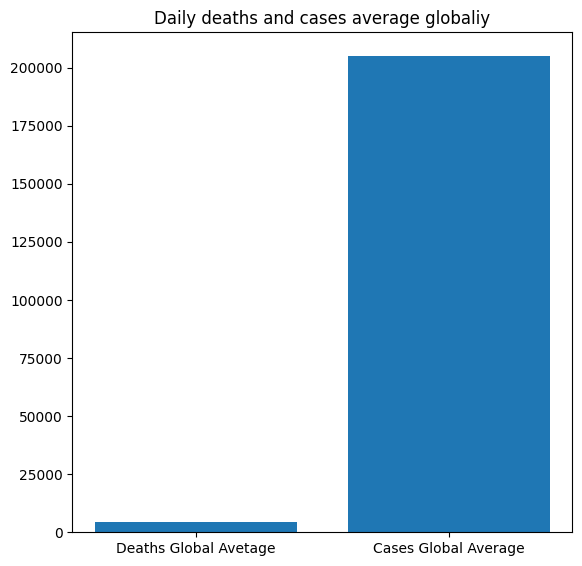

In [87]:
import matplotlib.pyplot as plt

x = ['Deaths Global Avetage', 'Cases Global Average']
y = [corona_global_deaths_avg, corona_global_cases_avg]

fig = plt.figure(figsize=(5,5))


ax = fig.add_axes([.1, .1, 1, 1])
ax.set_label('Averages')
ax.set_title('Daily deaths and cases average globaliy')
ax.bar(x, y)


In [91]:
avg_by_country = corona.groupby('Countries')[['deaths', 'cases']].agg([sum]).sort_values(by=('deaths', 'sum'), ascending=False)

avg_by_country = avg_by_country / corona_days

avg_by_country

,deaths,cases
,sum,sum
Countries,,
United_States_of_America,857.240688,46580.957020
Brazil,519.776504,19776.366762
India,410.759312,28321.203438
Mexico,326.512894,3581.787966
Italy,185.048711,5283.690544
...,...,...
Cambodia,0.000000,1.028653
Seychelles,0.000000,0.535817


<Axes: xlabel='Countries'>

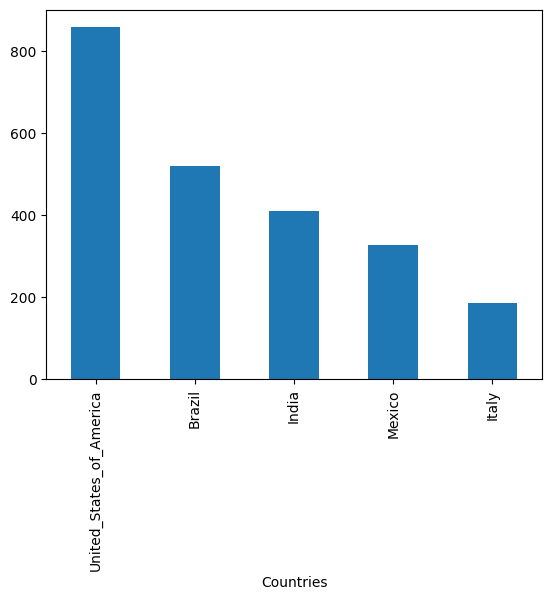

In [92]:
avg_by_country['deaths']['sum'].head(5).plot(kind='bar')